# PROYECT SETUP

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING AND EXPLORING DATA

In [179]:
df = pd.read_csv(r"C:\Users\Ian Mazzola\Desktop\Data Analyst\Datasets\website_wata.csv")

In [181]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [183]:
print("Dataframe shape:", df.shape)

Dataframe shape: (2000, 7)


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


# DATA PREPROCESSING

In [188]:
# Is there any missing values?
df.isnull().sum()

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64

In [190]:
# Is there any duplicated rows?
df.duplicated().sum()

0

# EXPLORATORY ANALYSIS

In [193]:
# Summary
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


### 1) Key drivers of engagement and conversion

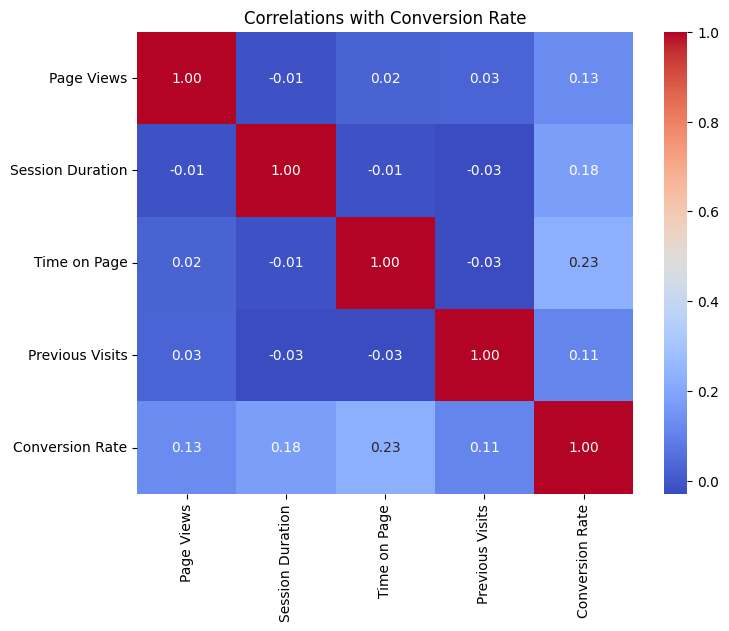

In [196]:
conversion_corr = df[["Page Views", "Session Duration", "Time on Page", "Previous Visits", "Conversion Rate"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(conversion_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlations with Conversion Rate")
plt.show()

Time on Page has the highest correlation with Conversion Rate but is weak. I want to see with scatterplots if it's a trend that explains the conversion.

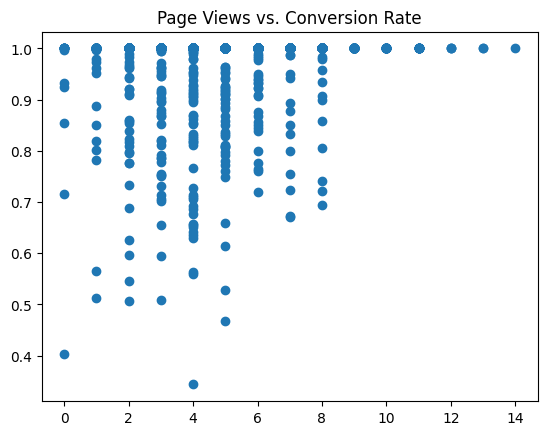

In [199]:
plt.scatter(df["Page Views"], df["Conversion Rate"])
plt.title(f"Page Views vs. Conversion Rate")
plt.show()

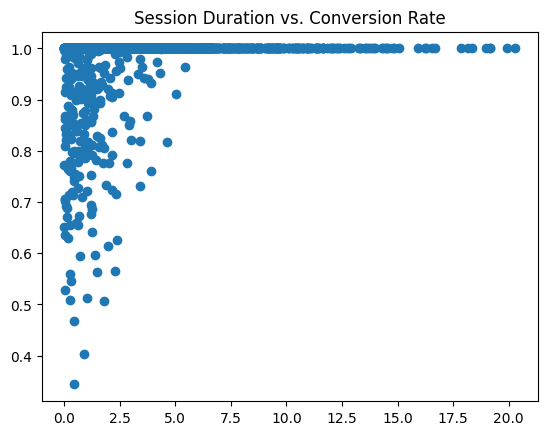

In [213]:
plt.scatter(df["Session Duration"], df["Conversion Rate"])
plt.title(f"Session Duration vs. Conversion Rate")
plt.savefig("session_duration.png", dpi=300, bbox_inches="tight")
plt.show()

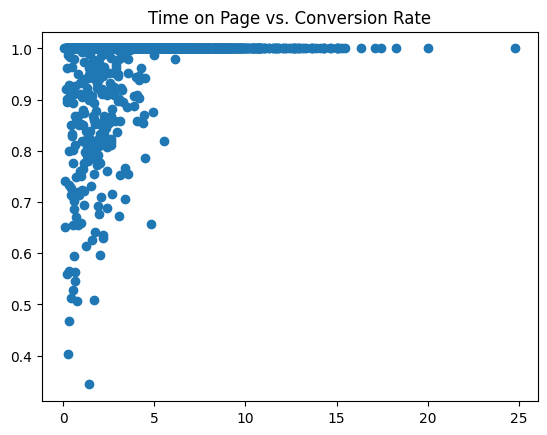

In [211]:
plt.scatter(df["Time on Page"], df["Conversion Rate"])
plt.title(f"Time on Page vs. Conversion Rate")
plt.savefig("time_on_page.png", dpi=300, bbox_inches="tight")
plt.show()

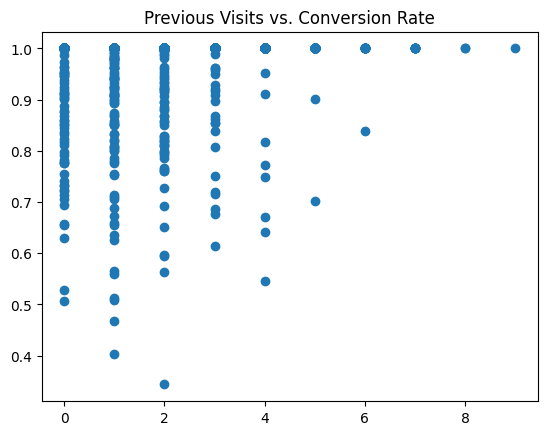

In [118]:
plt.scatter(df["Previous Visits"], df["Conversion Rate"])
plt.title(f"Previous Visits vs. Conversion Rate")
plt.show()

More time on page and longer sessions gets to more conversions.
- More than 6 minutes per session doesn't mean more conversion.
- More than 7 minutes in page also doesn't get more engamement.

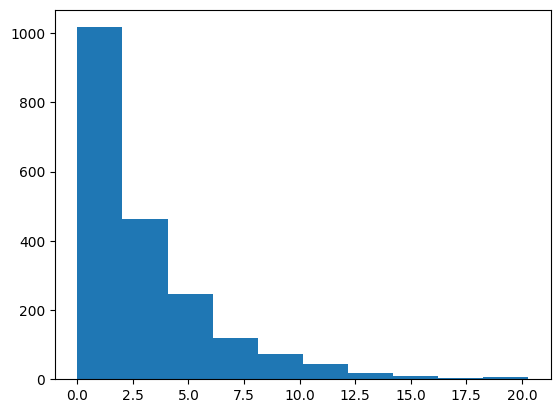

In [121]:
plt.hist(df["Session Duration"])
plt.show()

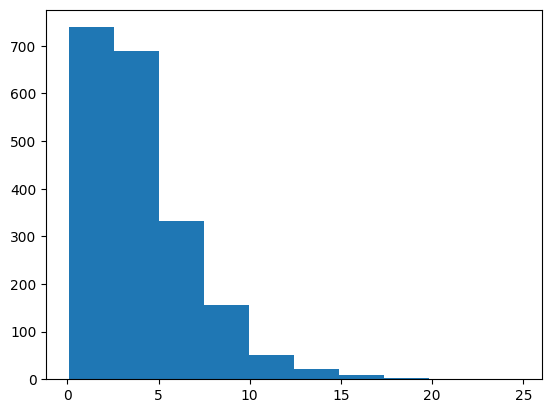

In [123]:
plt.hist(df["Time on Page"])
plt.show()

### 2) Traffic Sources

In [126]:
sources_conversion = df.groupby("Traffic Source")["Conversion Rate"].mean()
sources_conversion

Traffic Source
Direct      0.978679
Organic     0.982282
Paid        0.979009
Referral    0.987727
Social      0.982679
Name: Conversion Rate, dtype: float64

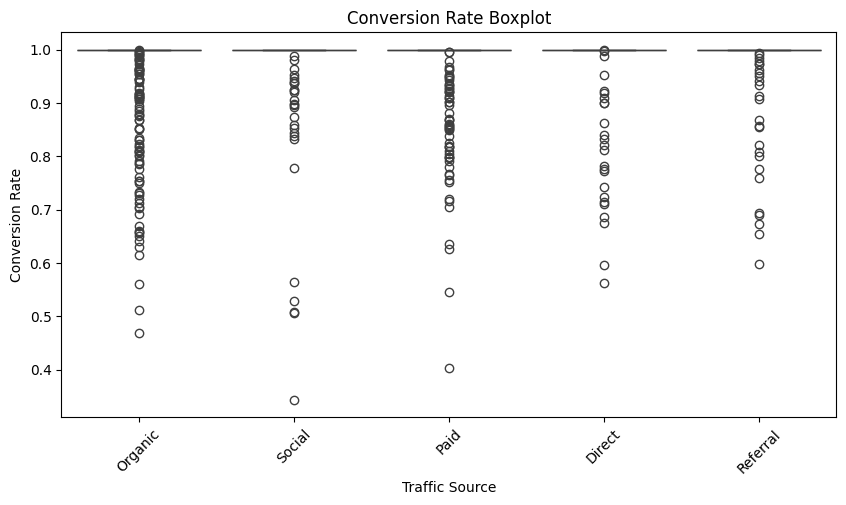

In [128]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Traffic Source", y="Conversion Rate", data=df)
plt.xticks(rotation=45)
plt.title(f"Conversion Rate Boxplot")
plt.show()

All 5 traffic sources are equally good in conversion, we don't see which one is better. 

C:\Users\Ian Mazzola\AppData\Local\Temp\ipykernel_16932\3377321489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_count.index, y=traffic_count.values, palette='viridis')


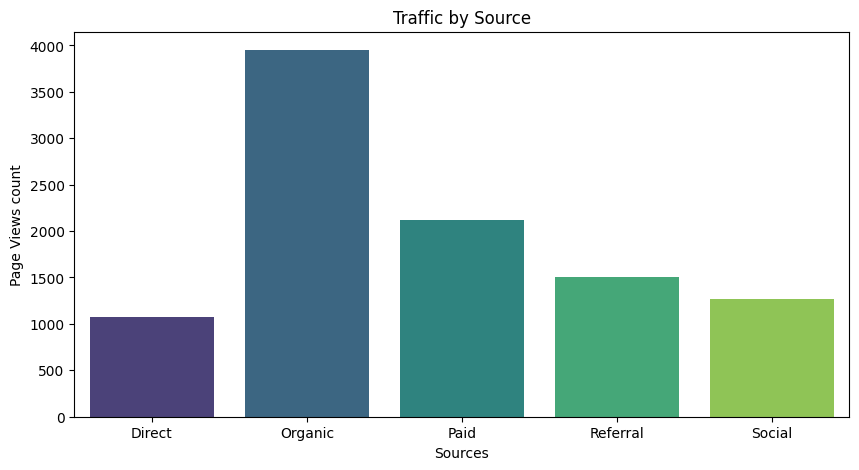

In [131]:
traffic_count = df.groupby("Traffic Source")["Page Views"].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=traffic_count.index, y=traffic_count.values, palette='viridis')
plt.xlabel("Sources")
plt.ylabel("Page Views count")
plt.title("Traffic by Source")

plt.show()

In [133]:
df.groupby("Traffic Source")["Page Views"].describe()

,count,mean,std,min,25%,50%,75%,max
Traffic Source,,,,,,,,
Direct,216.0,4.962963,2.186325,0.0,4.0,5.0,6.0,12.0
Organic,786.0,5.025445,2.215605,0.0,3.0,5.0,6.0,14.0
Paid,428.0,4.943925,2.143917,0.0,3.0,5.0,6.0,12.0
Referral,301.0,4.983389,2.253085,0.0,3.0,5.0,7.0,11.0
Social,269.0,4.695167,2.066979,0.0,3.0,5.0,6.0,11.0


All 5 traffic sources have a similar behaviour in terms of page views. I want to see if there's a difference in session duration or time on page. 

In [136]:
traffic_times = df.groupby("Traffic Source")[["Session Duration", "Time on Page"]].describe()
traffic_times

Session Duration                                          \
                          count      mean       std       min       25%   
Traffic Source                                                            
Direct                    216.0  2.692060  2.607922  0.005623  0.782534   
Organic                   786.0  3.104197  3.129038  0.003613  0.798019   
Paid                      428.0  2.942816  3.357014  0.004004  0.744411   
Referral                  301.0  3.125496  3.175788  0.012407  0.906594   
Social                    269.0  3.057273  2.894584  0.041262  0.933240   

                                              Time on Page            \
                     50%       75%        max        count      mean   
Traffic Source                                                         
Direct          1.884527  3.555395  13.687714        216.0  3.949045   
Organic         2.084026  4.451067  19.143636        786.0  3.977994   
Paid            1.773980  3.847234  20.290516        428.0  4.086919   
Referral        1.986940  4.338945  18.956373        301.0  3.984511   
Social          2.264424  4.193516  18.160452        269.0  4.188260   

                                                                             
                     std       min       25%       50%       75%        max  
Traffic Source                                                               
Direct          2.947980  0.126679  1.901823  3.053930  5.468556  20.021285  
Organic         2.797761  0.068515  1.948834  3.284525  5.275307  17.130635  
Paid            2.978834  0.162224  1.979665  3.388251  5.418637  24.796182  
Referral        3.075404  0.102497  1.697770  3.181636  5.404504  18.239964  
Social          2.741587  0.157288  2.131831  3.676774  5.586344  15.487085

- Direct traffic has the shortest Session Durations average, Organic and Referral has the highest. This could mean that users who enter from a search engine or a link tends to explore the webpage more than who type the URL into the browser's adress bar. Also maybe, users from direct traffic knows what they want.
- Traffic from announces and social media have the highest Time on Page average.

### 3) User Behaviours and Previous Visits

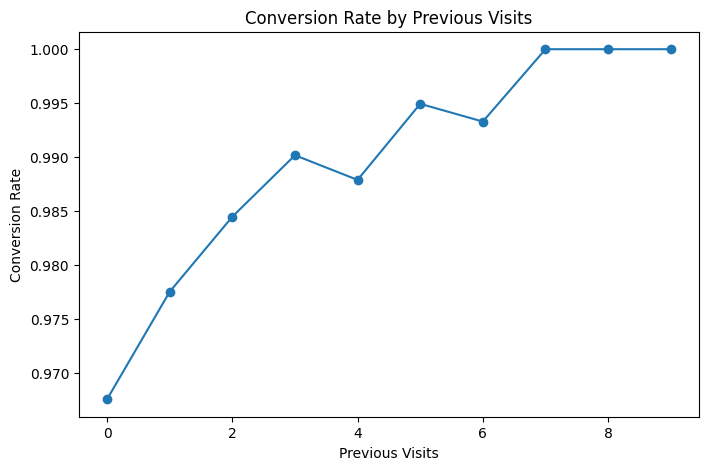

In [215]:
df.groupby("Previous Visits")["Conversion Rate"].mean().plot(kind="line", marker="o", figsize=(8,5))
plt.title(f"Conversion Rate by Previous Visits")
plt.xlabel("Previous Visits")
plt.ylabel("Conversion Rate")
plt.savefig("previous_visits_conversion.png", dpi=300, bbox_inches="tight")
plt.show()

- Nearly always, users with 5+ previous visits make a conversion.

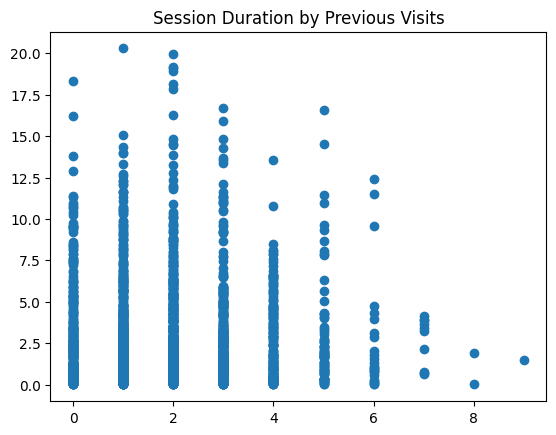

In [143]:
plt.scatter(df["Previous Visits"], df["Session Duration"])
plt.title(f"Session Duration by Previous Visits")
plt.show()

- With more previous visits, users tends to explore less the webpage. This could mean that they know what they want and where to found it.
  
This graphs suggests to work in improving customer loyalty. We could incentive users to come back to the webpage and push them to convert. We know that 5+ previous visits almost guarantees a conversion.

# 4) Machine Learning model to predict conversion

I will turn the problem to clasification. If conversion rate is less than 1.0 i asume that the user don't convert.

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [150]:
# If conversion rate < 1.0, conversion rate = 0.0
df["Conversion Rate"] = np.where(df["Conversion Rate"] == 1, 1, 0)

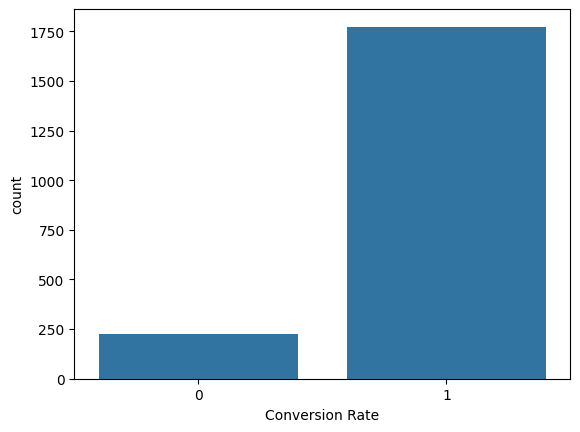

In [152]:
sns.countplot(data = df, x="Conversion Rate")
plt.show()

In [154]:
# Define feature vector (X) and target variable (y)
X = df[["Time on Page", "Previous Visits", "Session Duration"]]
y = df["Conversion Rate"]

In [156]:
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# Creating a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [160]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.35      0.43        37
           1       0.94      0.97      0.95       363

    accuracy                           0.91       400
   macro avg       0.74      0.66      0.69       400
weighted avg       0.90      0.91      0.90       400

Confusion Matrix:
 [[ 13  24]
 [ 11 352]]


In [162]:
# Creating a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [164]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.35      0.39        37
           1       0.94      0.96      0.95       363

    accuracy                           0.90       400
   macro avg       0.69      0.65      0.67       400
weighted avg       0.89      0.90      0.89       400

Confusion Matrix:
 [[ 13  24]
 [ 16 347]]


##### The Logistic Regression model is the best that i found.